<html><h1><center style="color:blue">Human Activity Recognition with Smartphones</center></h1></html>

<br> This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs,
Sitting, Standing or Laying.

30 participants(referred as subjects in this dataset) performed activities of daily living while carrying a waist-mounted 
smartphone. The phone was configured to record two implemented sensors (accelerometer and gyroscope). For these time series 
the directors of the underlying study performed feature generation and generated the dataset by moving a fixed-width window of
2.56s over the series. Since the windows had 50% overlap the resulting points are equally spaced (1.28s).This experiment 
was video recorded to label the data manually.

In [2]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('C:\\Users\\HP\\Downloads\\human+activity+recognition+using+smartphones\\UCI HAR Dataset\\UCI HAR Dataset\\features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


### Getting the  train data 

In [ ]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('C:\\Users\\HP\\Downloads\\human+activity+recognition+using+smartphones\\UCI HAR Dataset\\UCI HAR Dataset\\train\\X_train.txt', delim_whitespace=True, header=None)
X_train.columns = [features]
# add subject column to the dataframe
X_train['subject'] = pd.read_csv('C:\\Users\\HP\\Downloads\\human+activity+recognition+using+smartphones\\UCI HAR Dataset\\UCI HAR Dataset\\train\\subject_train.txt', header=None)

# Load the y_train data and assign activity labels
y_train = pd.read_csv('C:\\Users\\HP\\Downloads\\human+activity+recognition+using+smartphones\\UCI HAR Dataset\\UCI HAR Dataset\\train\\y_train.txt', names=['Activity'])

# Map the activity labels
y_train_labels = y_train['Activity'].map({
    1: 'WALKING', 
    2: 'WALKING_UPSTAIRS', 
    3: 'WALKING_DOWNSTAIRS', 
    4: 'SITTING', 
    5: 'STANDING', 
    6: 'LAYING'
})

# Add the labels to the train dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels

train.sample(2)


C:\Users\HP\AppData\Local\Temp\ipykernel_2400\2707799055.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('C:\\Users\\HP\\Downloads\\human+activity+recognition+using+smartphones\\UCI HAR Dataset\\UCI HAR Dataset\\train\\X_train.txt', delim_whitespace=True, header=None)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
5690,0.276248,-0.011082,-0.079034,-0.994244,-0.968849,-0.972983,-0.995104,-0.968575,-0.973465,-0.932343,...,0.011508,0.250400,-0.467931,0.423457,-0.867890,0.179885,-0.024869,26,5,STANDING
5508,0.277137,-0.017659,-0.109873,-0.999303,-0.988865,-0.993888,-0.999416,-0.987987,-0.995198,-0.945940,...,0.106437,-0.001743,0.240512,-0.142395,-0.865274,0.178814,-0.030936,26,5,STANDING


In [4]:
train.shape

(7352, 564)

### Getting the  test data 

In [5]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('C:\\Users\\HP\\Downloads\\human+activity+recognition+using+smartphones\\UCI HAR Dataset\\UCI HAR Dataset\\test\\X_test.txt', delim_whitespace=True, header=None)
X_test.columns = [features]
# add subject column to the dataframe
X_test['subject'] = pd.read_csv('C:\\Users\\HP\\Downloads\\human+activity+recognition+using+smartphones\\UCI HAR Dataset\\UCI HAR Dataset\\test\\subject_test.txt', header=None)

# get y labels from the txt file
y_test = pd.read_csv('C:\\Users\\HP\\Downloads\\human+activity+recognition+using+smartphones\\UCI HAR Dataset\\UCI HAR Dataset\\test\\y_test.txt',names=['Activity'])

# Map the activity labels to their names
y_test_labels = y_test['Activity'].map({
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
})
test = X_test
# Add the activity labels to the test dataframe
X_test['Activity'] = y_test['Activity']
X_test['ActivityName'] = y_test_labels

X_test.sample(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_2400\1281320712.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('C:\\Users\\HP\\Downloads\\human+activity+recognition+using+smartphones\\UCI HAR Dataset\\UCI HAR Dataset\\test\\X_test.txt', delim_whitespace=True, header=None)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2548,0.282910,-0.050251,-0.171255,0.025465,0.199581,-0.211792,-0.023840,0.247795,-0.211569,0.157438,...,-0.191184,-0.939539,0.965733,-0.607990,-0.524391,0.425841,-0.004259,20,2,WALKING_UPSTAIRS
1340,0.324442,-0.051408,-0.120193,-0.274102,-0.113489,-0.356779,-0.335211,-0.136949,-0.339064,0.147085,...,-0.459182,0.580609,-0.641478,-0.198413,-0.731079,0.248521,0.130103,12,2,WALKING_UPSTAIRS


In [6]:
test.shape

(2947, 564)

## Time to Data Cleaning

### 1. Check for Duplicates

In [50]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

C:\Users\HP\AppData\Local\Temp\ipykernel_2956\408555551.py:1: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\HP\AppData\Local\Temp\ipykernel_2956\408555551.py:2: PerformanceWarning:

indexing past lexsort depth may impact performance.



No of duplicates in train: 0
No of duplicates in test : 0


### 2. Checking for NaN/null values

In [51]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


### 3. Save this dataframe in a csv files

In [52]:
import os

# Ensure the directory exists
output_dir = 'UCI_HAR_Dataset/csv_files'
os.makedirs(output_dir, exist_ok=True)

# Save the DataFrames to CSV
train.to_csv(os.path.join(output_dir, 'train.csv'), index=False)
test.to_csv(os.path.join(output_dir, 'test.csv'), index=False)


PermissionError: [Errno 13] Permission denied: 'UCI_HAR_Dataset/csv_files\\train.csv'

## Exploratory Data Analysis

### Obtain the train and test data

In [ ]:
train = pd.read_csv('UCI_HAR_dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


### All the feature name with lots of unnecessary singhs:  Changing feature names 

In [ ]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

### 1. investigate participants activity durations.
- Since the dataset has been created in a scientific environment nearly equal preconditions for the participants can be assumed. Let us investigate their activity durations.

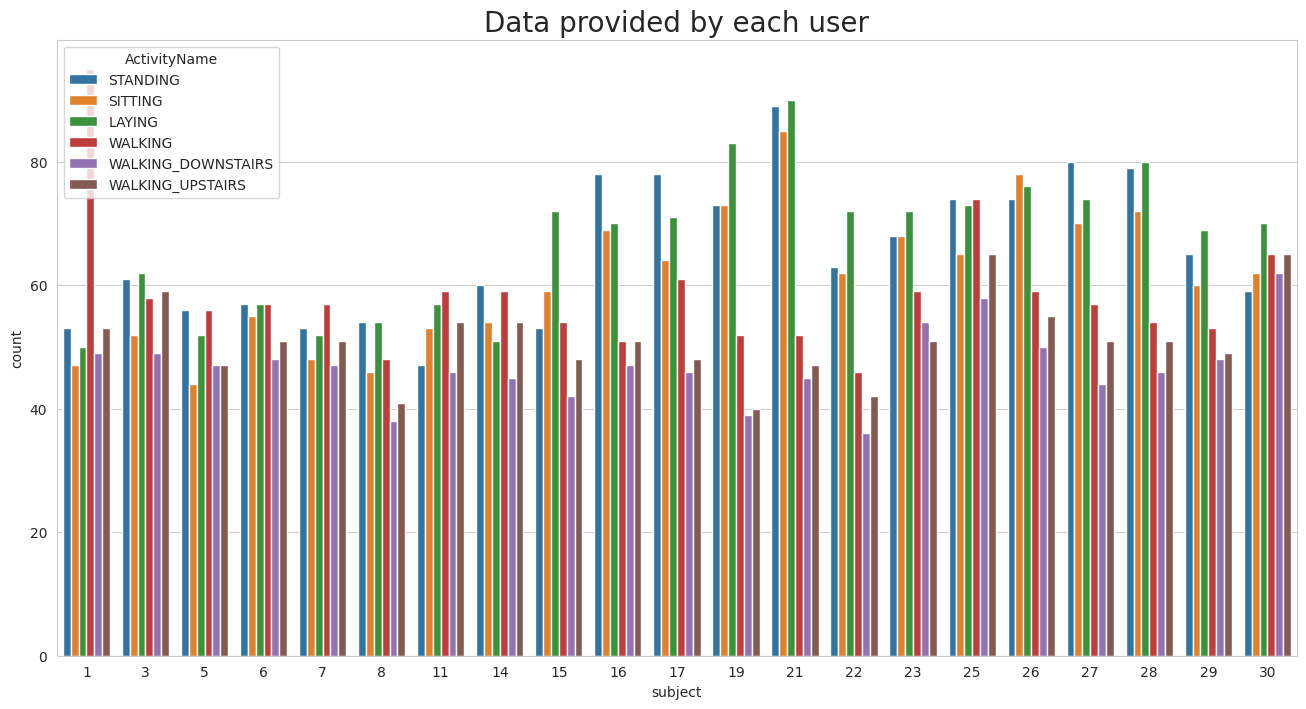

In [ ]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

- Nearly all participants have more data for walking upstairs than downstairs. Assuming an equal number of up- and down-walks the participants need longer walking upstairs.

### How Are The ActivityName Distributed?

In [ ]:
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


# Plotting data
label_counts = train['ActivityName'].value_counts()

# Get colors
n = label_counts.shape[0]
colormap = plt.get_cmap('viridis')
colors = [mlt.colors.to_hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Create plot
data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Smartphone ActivityName Distribution',
                   xaxis = dict(title = 'ActivityName'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
fig.show()
#iplot(fig)

- Although there are fluctuations in the label counts, the labels are quite equally distributed.

- Assuming the participants had to walk the same number of stairs upwards as well as downwards and knowing the smartphones had a constant sampling rate, there should be the same amount of datapoints for walking upstairs and downstairs.
- Disregarding the possibility of flawed data, the participants seem to walk roughly 10% faster downwards.

### 2. Featuring Engineering from Domain Knowledge 

+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.



### 3. Stationary and Moving activities are completely different

In [ ]:
print(train.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\HP\AppData\Lo

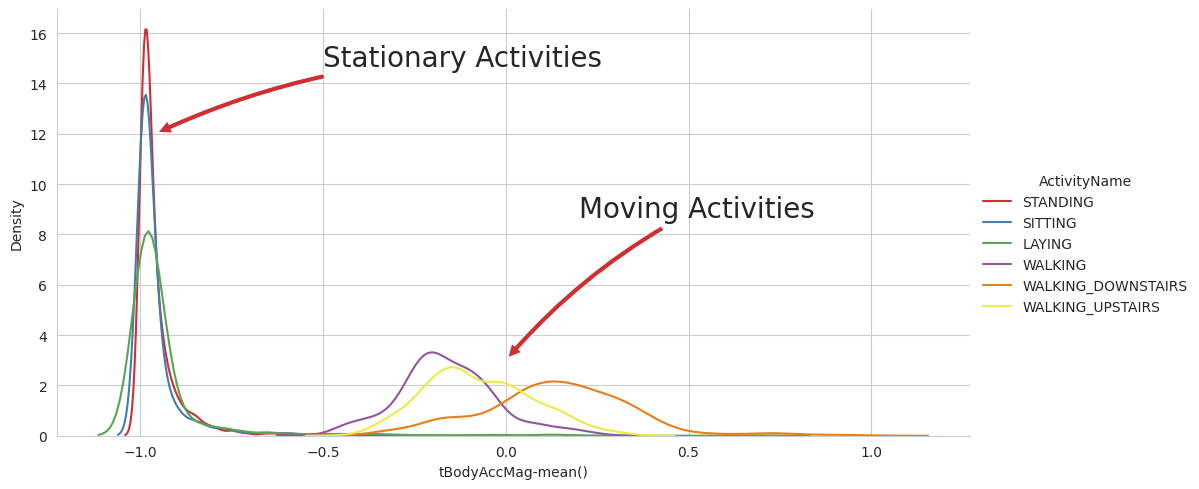

In [ ]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=5,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.960,12), xytext=(-0.5, 15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

- As aspected from most real world data, when participants are moving the data is normally distributed with some long tail.

C:\Users\HP\AppData\Local\Temp\ipykernel_2956\305189379.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\HP\AppData\Local\Temp\ipykernel_2956\305189379.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\HP\AppData\Local\Temp\ipykernel_2956\305189379.py:14: UserWarning:



`distpl

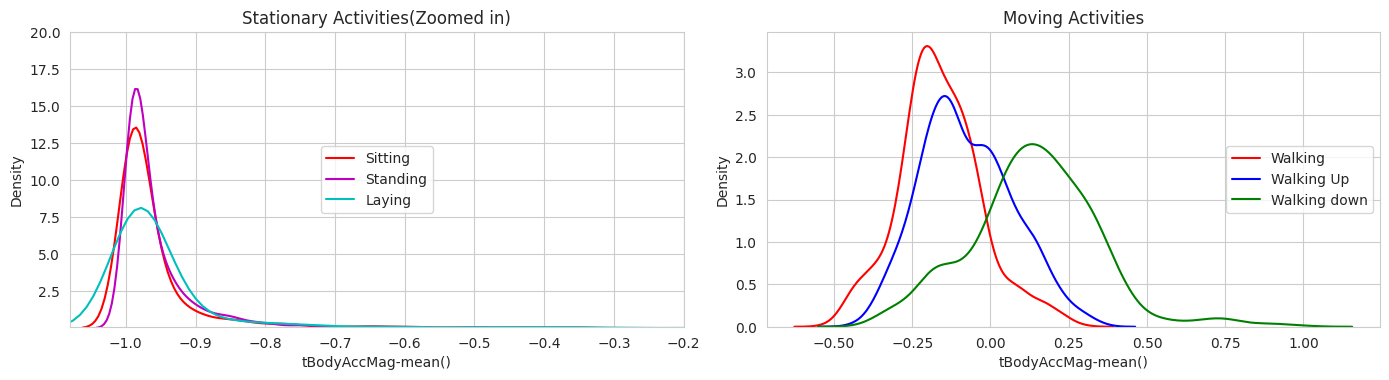

In [ ]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMag-mean()'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMag-mean()'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMag-mean()'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.08, -0.2, 0.1, 20])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMag-mean()'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMag-mean()'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMag-mean()'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

- We can see clearly here, the distribuation of Stationary Activities and Moving Activities.

### 4. Magnitude of an acceleration can saperate it well

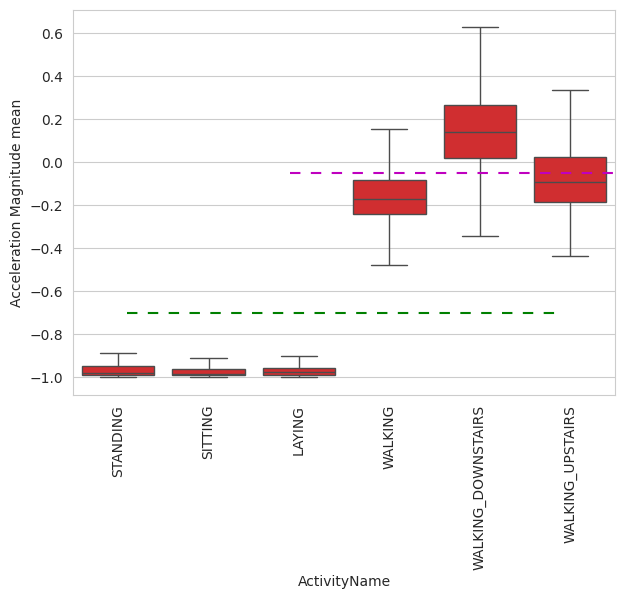

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='ActivityName', y='tBodyAccMag-mean()',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 5. Position of GravityAccelerationComponants also matters 

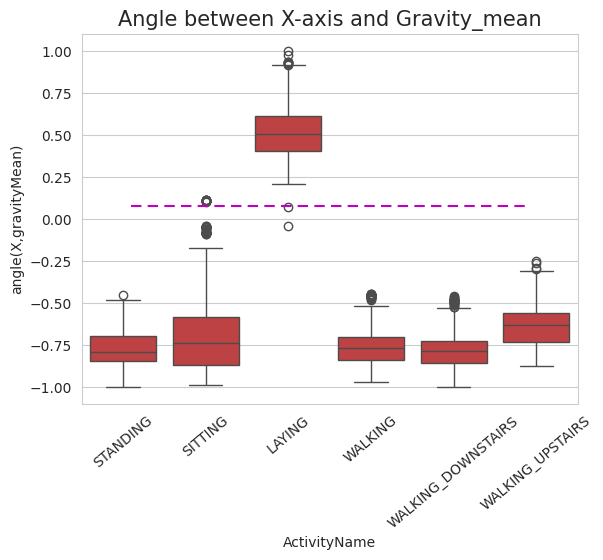

In [ ]:
sns.boxplot(x='ActivityName', y='angle(X,gravityMean)', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

- If angleX,gravityMean > 0 then Activity is Laying.
- We can classify all datapoints belonging to Laying activity with just a single if else statement.

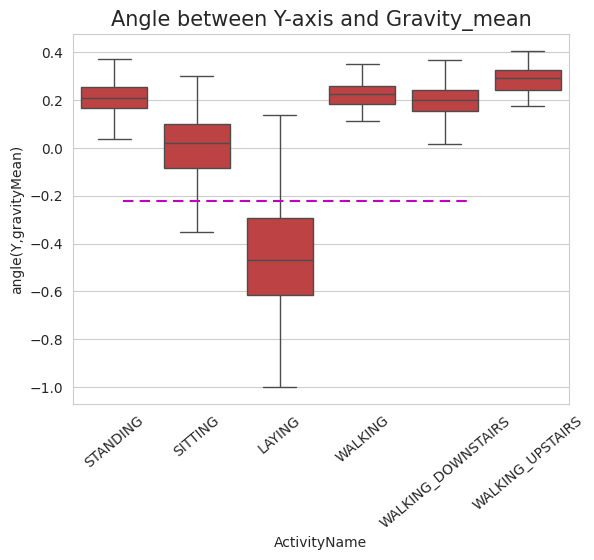

In [ ]:
sns.boxplot(x='ActivityName', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

## Apply t-sne on the data 
#### Are The Activities Separable?
- The dataset is geared towards classifying the activity of the participant. Let us investigate the separability of the classes.

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.011s...
[t-SNE] Computed neighbors for 7352 samples in 0.493s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597464
[t-SNE] Computed conditional probabilities in 0.018s
[t-SNE] Iteration 50: error = 119.3542480, gradient norm = 0.0408375 (50 iterations in 0.832s)
[t-SNE] Iteration 100: error = 105.0443878, gradient norm = 0.0245142 (50 iterations in 

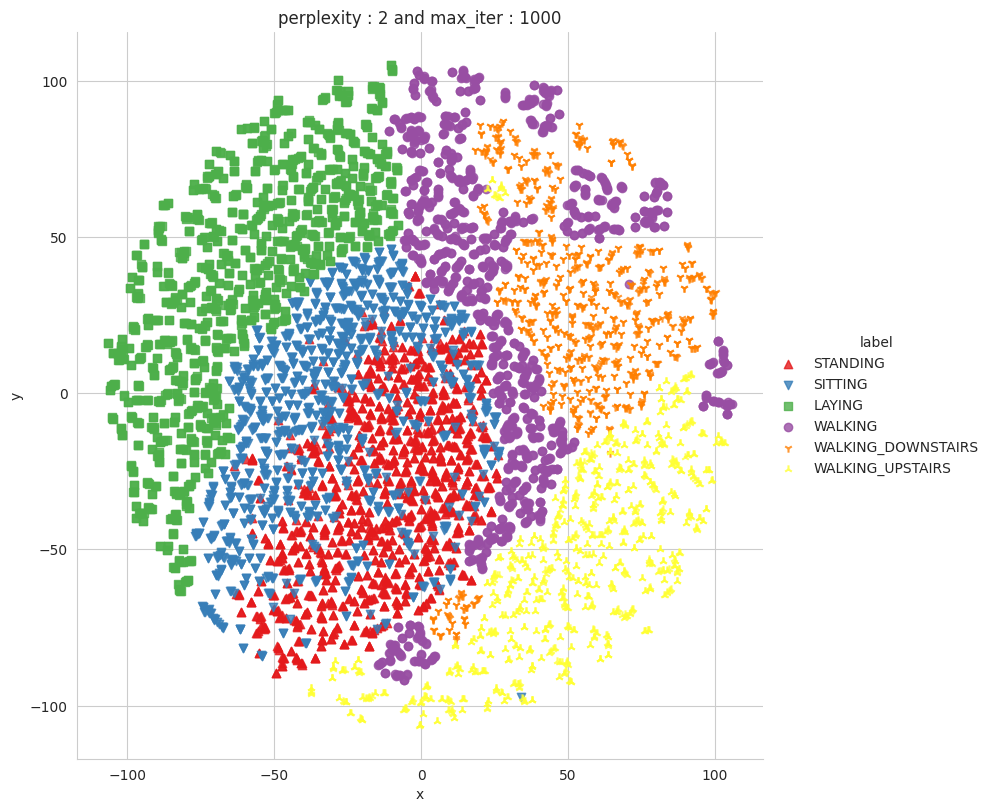

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.012s...
[t-SNE] Computed neighbors for 7352 samples in 0.341s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.019s
[t-SNE] Iteration 50: error = 107.1622772, gradient norm = 0.0414925 (50 iterations in 0.826s)
[t-SNE] Iteration 100: error = 95.6826782, gradient norm = 0.0152334 (50 iteration

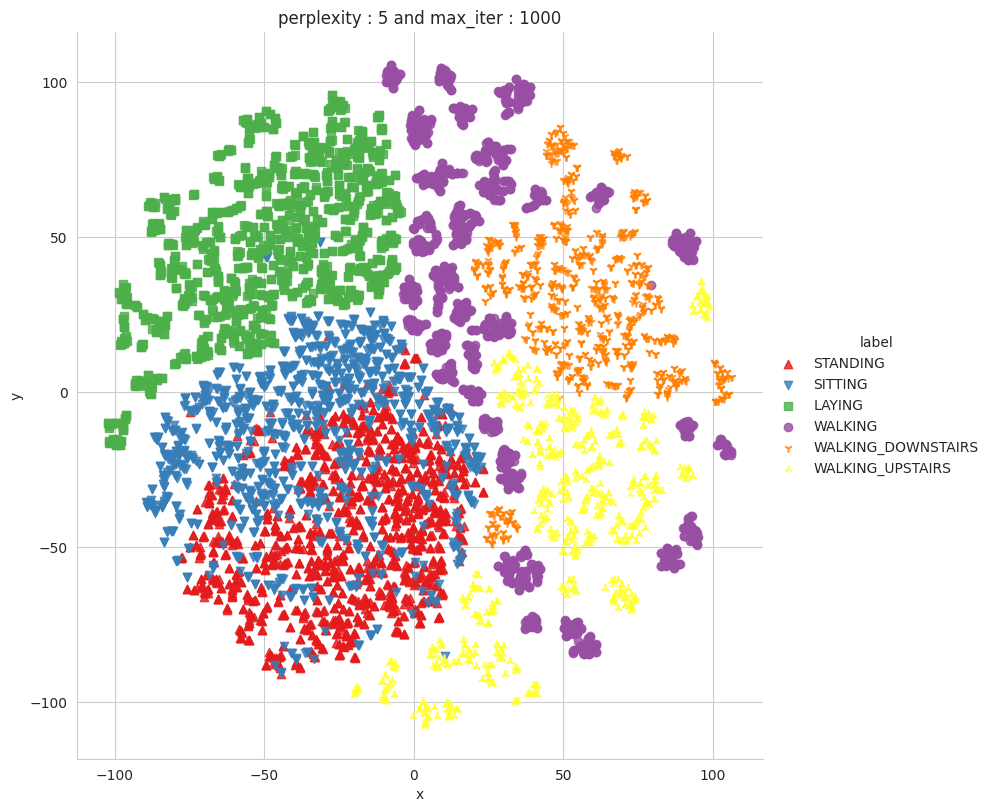

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.012s...
[t-SNE] Computed neighbors for 7352 samples in 0.346s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.033s
[t-SNE] Iteration 50: error = 97.8973923, gradient norm = 0.0359282 (50 iterations in 0.854s)
[t-SNE] Iteration 100: error = 88.9394302, gradient norm = 0.0099389 (50 iteration

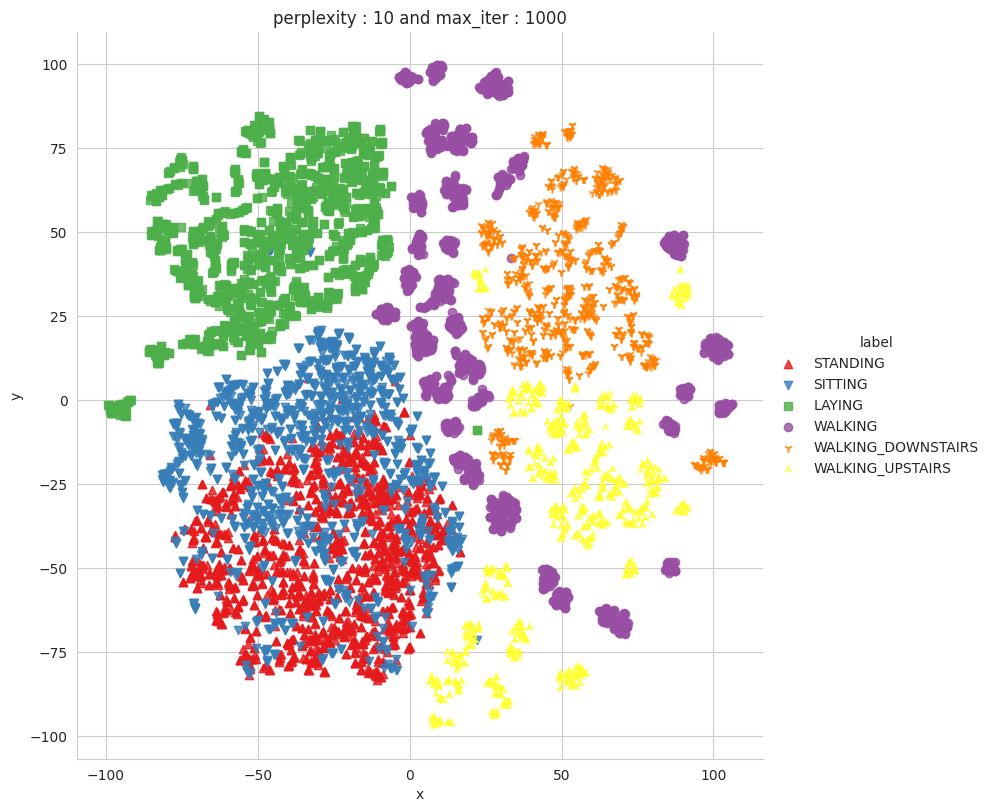

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.012s...
[t-SNE] Computed neighbors for 7352 samples in 0.361s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.069s
[t-SNE] Iteration 50: error = 89.3012543, gradient norm = 0.0307578 (50 iterations in 0.911s)
[t-SNE] Iteration 100: error = 82.9654007, gradient norm = 0.0077097 (50 iteration

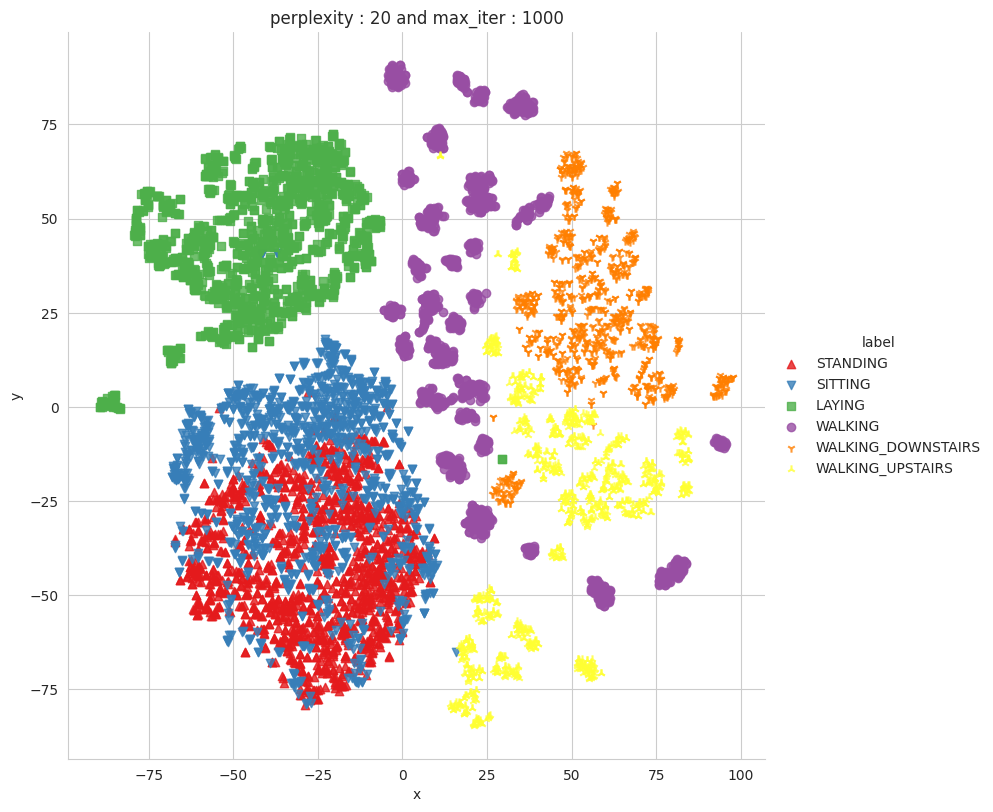

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.012s...
[t-SNE] Computed neighbors for 7352 samples in 0.481s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.177s
[t-SNE] Iteration 50: error = 78.8781815, gradient norm = 0.0241638 (50 iterations in 1.475s)
[t-SNE] Iteration 100: error = 75.2925491, gradient norm = 0.0052641 (50 iteratio

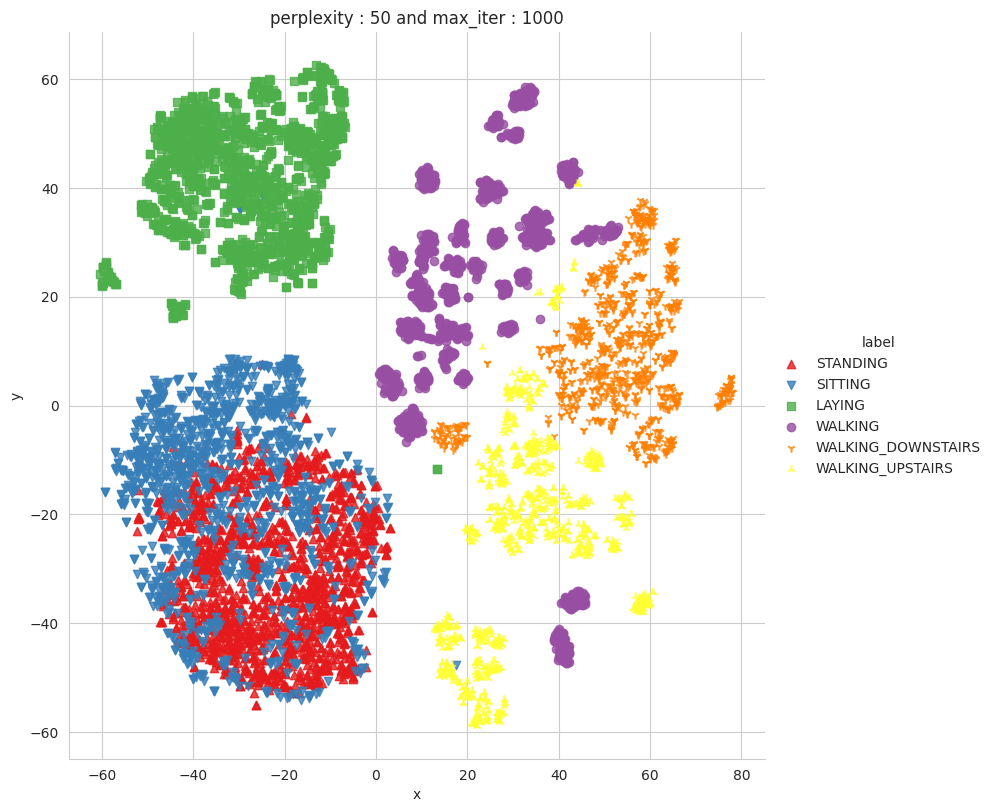

Done


In [ ]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

- We can clearly see the TSNE cluster, All the Activity are clean seperate except "Standing" and "Sitting". 